<a href="https://colab.research.google.com/github/SheetalData/Semantic_Segmentation/blob/main/Scripts/Detectron2_Model_RecentError.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install dependency

!python -m pip install pyyaml==5.1
import sys, os, distutils.core
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 38.5 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp38-cp38-linux_x86_64.whl size=44089 sha256=7810e3c760cb9642f24ee887b95ce50c25467d8119c69e92825b0a29532c3522
  Stored in directory: /root/.cache/pip/wheels/52/dd/2b/10ff8b0ac81b93946bb5fb9e6749bae2dac246506c8774e6cf
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.2.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.


In [2]:
pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0 --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
     |████████████████▎               | 834.1 MB 1.3 MB/s eta 0:10:39tcmalloc: large alloc 1147494400 bytes == 0x38e64000 @  0x7f70b369a615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x4fd8b5 0x4997c7 0x4fd8b5 0x49abe4 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x5d8868 0x5da092 0x587116 0x5d8d8c 0x55dc1e 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4990ca 0x5d8868 0x4997a2 0x4fd8b5 0x49abe4
     |████████████████████▋           | 1055.7 MB 1.3 MB/s eta 0:07:19tcmalloc: large alloc 1434370048 bytes == 0x7d4ba000 @  0x7f70b369a615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x4fd8b5 0x4997c7 0x4fd8b5 0x49abe4 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x5d8868 0x5da092 0x587116 0x5d8d8c 0x55dc1e 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4990ca 0x5d8868 0x4997a2 0x4fd8b5 0x49abe4
     |██████████████████████████▏     | 

In [3]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

1.11.0+cu113 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [4]:
#pytorch version 1.10 and CUDA 11.1 is installed
#import torch
#import requests
#assert torch.__version__.startswith("1.9")

In [5]:

#!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html

!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-jlrjpt8_
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-jlrjpt8_
     |████████████████████████████████| 50 kB 6.9 MB/s 
     |████████████████████████████████| 79 kB 5.7 MB/s 
     |████████████████████████████████| 153 kB 65.8 MB/s 
     |████████████████████████████████| 1.5 MB 45.1 MB/s 
     |████████████████████████████████| 549 kB 65.0 MB/s 
     |████████████████████████████████| 117 kB 86.5 MB/s 
     |████████████████████████████████| 96 kB 6.0 MB/s 
     |████████████████████████████████| 182 kB 69.9 MB/s 
  Created wheel for detectron2: filename=detectron2-0.6-cp38-cp38-linux_x86_64.whl size=5258344 sha256=b3bcd89631eadc0b7e6d4c74b58addc9fb6b2b60966a776dcfd29dac8ffb59c4
  Stored in directory: /tmp/pip-ephem-wheel-cache-9vi1i3xt/wheels/19/ac/6

In [6]:
#Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import os, json, cv2, random
import warnings
warnings.filterwarnings('ignore') #Ignore "future" warnings and Data-Frame-Slicing warnings.


# detectron2

from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor, DefaultTrainer, launch
from detectron2.structures import BoxMode
from detectron2.utils.visualizer import ColorMode
from detectron2.utils.logger import setup_logger
from detectron2.utils.visualizer import Visualizer

from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader, build_detection_train_loader
from detectron2.data import detection_utils as utils
import detectron2.data.transforms as T
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

setup_logger()

<Logger detectron2 (DEBUG)>

In [31]:
!pip install pipreqs



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pipreqs 

In [7]:
#Register Coco datasetfrom detectron2.data.datasets import register_coco_instances


register_coco_instances("Data_Register_training",{}, "/content/drive/MyDrive/Data/Merge/Train/results/merged/annotations/merged.json", "/content/drive/MyDrive/Data/Merge/results/Train")
register_coco_instances("Data_Register_valid",{},"/content/drive/MyDrive/Data/Merge/Valid/results/merged/annotations/merged.json", "/content/drive/MyDrive/Data/Merge/results/Valid")

metadata = MetadataCatalog.get("Data_Register_training")
dataset_train = DatasetCatalog.get("Data_Register_training")
dataset_valid = DatasetCatalog.get("Data_Register_valid")

[12/13 11:30:00 d2.data.datasets.coco]: Loading /content/drive/MyDrive/Data/Merge/Train/results/merged/annotations/merged.json takes 8.34 seconds.
WARNING [12/13 11:30:00 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/13 11:30:00 d2.data.datasets.coco]: Loaded 6975 images in COCO format from /content/drive/MyDrive/Data/Merge/Train/results/merged/annotations/merged.json
[12/13 11:30:07 d2.data.datasets.coco]: Loading /content/drive/MyDrive/Data/Merge/Valid/results/merged/annotations/merged.json takes 3.02 seconds.
WARNING [12/13 11:30:07 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/13 11:30:07 d2.data.datasets.coco]: Loaded 2100 images in COCO format from /content/drive/MyDrive/Data/Merge/Valid/results/merged/annotations/merged.json


In [8]:
for d in dataset_train:
    annos = [obj for obj in d['annotations'] if 'segmentation' in obj]
    d['annotations'] = annos

    for obj in d['annotations']:
        if 'segmentation' not in obj:
            print(f'{d["file_name"]} has an annotation with no segmentation field')
            exclude.add(["file_name"])


(427, 640, 3)


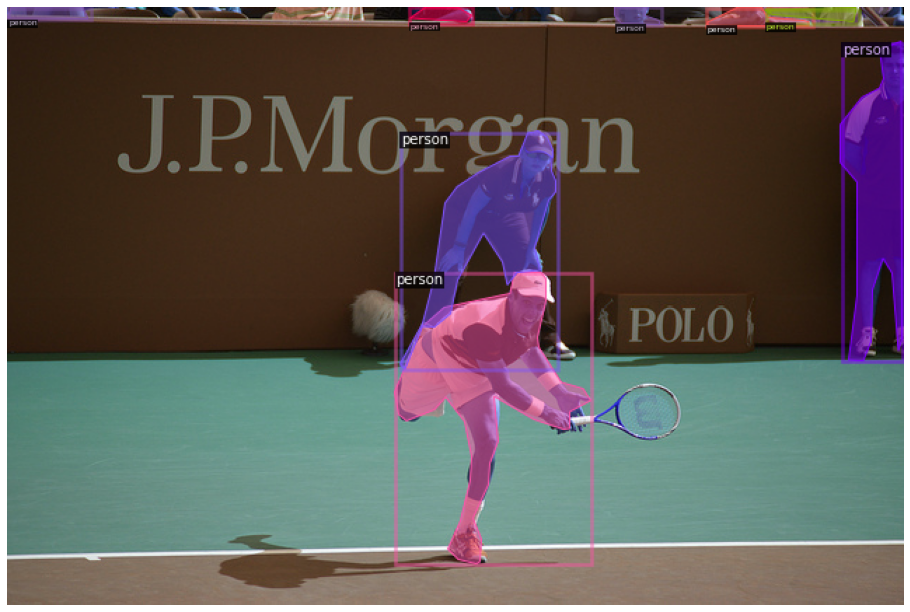

In [9]:
fig, ax = plt.subplots(figsize =(18,11))
d=dataset_valid[4] 
img = cv2.imread(d["file_name"])
print(img.shape)
v = Visualizer(img[:, :, ::-1],
                metadata=metadata, 
                scale=1,
                instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
out = v.draw_dataset_dict(d)
ax.grid(False)
ax.axis('off')
ax.imshow(out.get_image()[:, :, ::-1])

In [10]:
#Training
cfg = get_cfg()
config_name = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml" 
cfg.merge_from_file(model_zoo.get_config_file(config_name))
cfg.DATASETS.TRAIN = ("Data_Register_training",)
cfg.DATASETS.TEST = ("Data_Register_valid",)

#cfg.MODEL.WEIGHTS ="../input/detectron2cell/output/model_final.pth"

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(config_name)

cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64  # 64 is slower but more accurate (128 faster but less accurate)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 148
cfg.SOLVER.IMS_PER_BATCH = 2 #(2 is per defaults)
cfg.INPUT.MASK_FORMAT='bitmask'
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

cfg.SOLVER.BASE_LR = 0.0005 
#cfg.SOLVER.MOMENTUM = 0.9
#cfg.SOLVER.WEIGHT_DECAY = 0.0005
#cfg.SOLVER.GAMMA = 0.1
cfg.MODEL.SEM_SEG_HEAD.NUM_CLASSES = 148
    
cfg.SOLVER.WARMUP_ITERS = 10 
cfg.SOLVER.MAX_ITER = 2000 
cfg.SOLVER.STEPS = (500, 1000) 
cfg.TEST.EVAL_PERIOD = 250
cfg.SOLVER.CHECKPOINT_PERIOD=250

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True) 
trainer = DefaultTrainer(cfg)  # without data augmentation
trainer.resume_or_load(resume=False)
trainer.train()

[12/13 11:30:35 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [07:33, 392kB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[12/13 11:38:24 d2.engine.train_loop]: Starting training from iteration 0
[12/13 11:40:03 d2.utils.events]:  eta: 0:30:16  iter: 19  total_loss: 6.069  loss_cls: 3.994  loss_box_reg: 0.7193  loss_mask: 0.6855  loss_rpn_cls: 0.3576  loss_rpn_loc: 0.3846  time: 1.0374  data_time: 4.2893  lr: 0.0005  max_mem: 2769M
[12/13 11:40:23 d2.utils.events]:  eta: 0:30:08  iter: 39  total_loss: 3.398  loss_cls: 1.527  loss_box_reg: 0.7326  loss_mask: 0.6375  loss_rpn_cls: 0.171  loss_rpn_loc: 0.3465  time: 1.0228  data_time: 0.3582  lr: 0.0005  max_mem: 2969M
[12/13 11:40:43 d2.utils.events]:  eta: 0:32:29  iter: 59  total_loss: 3.299  loss_cls: 1.353  loss_box_reg: 0.7575  loss_mask: 0.5973  loss_rpn_cls: 0.2059  loss_rpn_loc: 0.3455  time: 1.0189  data_time: 0.3604  lr: 0.0005  max_mem: 3029M
[12/13 11:41:03 d2.utils.events]:  eta: 0:32:09  iter: 79  total_loss: 2.951  loss_cls: 1.122  loss_box_reg: 0.7491  loss_mask: 0.552  loss_rpn_cls: 0.1269  loss_rpn_loc: 0.3741  time: 1.0129  data_time: 0.3

KeyError: ignored

In [ ]:
from detectron2.evaluation.evaluator import DatasetEvaluator
import pycocotools.mask as mask_util
def precision_at(threshold, iou):
    matches = iou > threshold
    true_positives = np.sum(matches, axis=1) == 1  # Correct objects
    false_positives = np.sum(matches, axis=0) == 0  # Missed objects
    false_negatives = np.sum(matches, axis=1) == 0  # Extra objects
    return np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)

def score(pred, targ):
    pred_masks = pred['instances'].pred_masks.cpu().numpy()
    enc_preds = [mask_util.encode(np.asarray(p, order='F')) for p in pred_masks]
    enc_targs = list(map(lambda x:x['segmentation'], targ))
    ious = mask_util.iou(enc_preds, enc_targs, [0]*len(enc_targs))
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, ious)
        p = tp / (tp + fp + fn)
        prec.append(p)
    return np.mean(prec)

class MAPIOUEvaluator(DatasetEvaluator):
    def __init__(self, dataset_name):
        dataset_dicts = DatasetCatalog.get(dataset_name)
        self.annotations_cache = {item['image_id']:item['annotations'] for item in dataset_dicts}
            
    def reset(self):
        self.scores = []

    def process(self, inputs, outputs):
        for inp, out in zip(inputs, outputs):
            if len(out['instances']) == 0:
                self.scores.append(0)    
            else:
                targ = self.annotations_cache[inp['image_id']]
                self.scores.append(score(out, targ))

    def evaluate(self):
        return {"MaP IoU": np.mean(self.scores)}



In [ ]:
#Evaluation

In [ ]:
evaluator = COCOEvaluator("Data_Register_valid", cfg, False, output_dir="./output/")
cfg.MODEL.WEIGHTS="../input/detectron2cell/output/model_final.pth"
#cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2   # set a custom testing threshold
#cfg.INPUT.MASK_FORMAT='polygon'
val_loader = build_detection_test_loader(cfg, "Data_Register_valid")
inference_on_dataset(trainer.model, val_loader, evaluator)

In [ ]:
import pandas as pd
metrics_df = pd.read_json("./output/metrics.json", orient="records", lines=True)
mdf = metrics_df.sort_values("iteration")

In [ ]:
#Training Progress

In [ ]:
# 1. Loss curve
fig, ax = plt.subplots()

mdf1 = mdf[~mdf["total_loss"].isna()]
ax.plot(mdf1["iteration"], mdf1["total_loss"], c="C0", label="train")
if "validation_loss" in mdf.columns:
    mdf2 = mdf[~mdf["validation_loss"].isna()]
    ax.plot(mdf2["iteration"], mdf2["validation_loss"], c="C1", label="validation")

# ax.set_ylim([0, 0.5])
ax.legend()
ax.set_title("Loss curve")
plt.show()

In [ ]:
# 2. Accuracy curve
fig, ax = plt.subplots()

mdf1 = mdf[~mdf["fast_rcnn/cls_accuracy"].isna()]
ax.plot(mdf1["iteration"], mdf1["fast_rcnn/cls_accuracy"], c="C0", label="train")
# ax.set_ylim([0, 0.5])
ax.legend()
ax.set_title("Accuracy curve")
plt.show()

In [ ]:
#Prediction

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
#cfg.MODEL.WEIGHTS = "./output/model_final.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set a custom testing threshold for this model
cfg.DATASETS.TEST = ("Data_Register_valid", )
predictor = DefaultPredictor(cfg)

In [ ]:
fig, ax = plt.subplots(4, 1, figsize =(20,50))
indices=[ax[0],ax[1],ax[2],ax[3] ]
i=-1
for d in random.sample(dataset_valid, 4):
    i=i+1    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=metadata, 
                   scale=1, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    indices[i].grid(False)
    indices[i].imshow(out.get_image()[:, :, ::-1])